# Distâncias e associações

Neste caderno, vamos ver exemplos do cálculo de distância e associações com bibliotecas do Python. 

In [ ]:
# pacote que implementa vários métodos de codificação de variáveis categóricas
!pip install category_encoders

     |████████████████████████████████| 81kB 3.6MB/s 


## Carregamento das bibliotecas

In [ ]:
# importa o pandas
import pandas as pd

# gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Escalonamento multidmensional
from sklearn.manifold import MDS

# transformação de atributos
from category_encoders import OneHotEncoder, OrdinalEncoder

# cálculo de distâncias
from scipy.spatial.distance import pdist, squareform

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Base de dados 

Vamos carregar uma base de dados no *National Health and Examination Survey*, uma pesquisa por amostragem feita pelo *Centers of Disease Control and Preventions*, uma agência dos EUA para monitoramento de saúde. Essa Base de dados é uma amostra de registros dos anos fiscais 2009/10 e 2011/12. Uma descrição do processo de coleta, bom como outros anos, pode ser encontrada [aqui](https://wwwn.cdc.gov/nchs/nhanes/tutorials/default.aspx)

In [ ]:
#carrega base de deados 
NHANES = pd.read_csv('https://raw.githubusercontent.com/ProjectMOSAIC/NHANES/master/data-raw/NHANES.csv',index_col='ID')

Vamos explorar um pouco a base:

In [ ]:
# amostra aleatória

NHANES.sample(10)

,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,HHIncomeMid,Poverty,HomeRooms,HomeOwn,Work,Weight,Length,HeadCirc,Height,BMI,BMICatUnder20yrs,BMI_WHO,Pulse,BPSysAve,BPDiaAve,BPSys1,BPDia1,BPSys2,BPDia2,BPSys3,BPDia3,Testosterone,DirectChol,TotChol,UrineVol1,UrineFlow1,UrineVol2,UrineFlow2,Diabetes,DiabetesAge,HealthGen,DaysPhysHlthBad,DaysMentHlthBad,LittleInterest,Depressed,nPregnancies,nBabies,Age1stBaby,SleepHrsNight,SleepTrouble,PhysActive,PhysActiveDays,TVHrsDay,CompHrsDay,TVHrsDayChild,CompHrsDayChild,Alcohol12PlusYr,AlcoholDay,AlcoholYear,SmokeNow,Smoke100,Smoke100n,SmokeAge,Marijuana,AgeFirstMarij,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68491,2011_12,male,80,NaN,NaN,White,White,9_11thGrade,Married,35000-44999,40000.0,2.45,5.0,Own,NotWorking,87.1,NaN,NaN,172.6,29.20,NaN,25.0_to_29.9,66.0,133.0,68.0,136.0,68.0,132.0,66.0,134.0,70.0,204.28,1.53,2.87,77.0,0.203,NaN,NaN,No,NaN,Good,0.0,0.0,None,None,NaN,NaN,NaN,10.0,No,No,NaN,More_4_hr,0_hrs,NaN,NaN,Yes,1.0,364.0,NaN,No,Non-Smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70858,2011_12,female,9,0-9,NaN,White,White,NaN,NaN,65000-74999,70000.0,2.77,9.0,Own,NaN,50.1,NaN,NaN,150.6,22.10,c_OverWeight,18.5_to_24.9,92.0,103.0,49.0,102.0,64.0,102.0,46.0,104.0,52.0,9.11,1.01,3.72,103.0,0.367,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3_hr,2_hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58769,2009_10,male,32,30-39,387.0,White,NaN,HighSchool,Married,25000-34999,30000.0,0.97,7.0,Own,Working,98.6,NaN,NaN,169.7,34.24,NaN,30.0_plus,78.0,118.0,83.0,NaN,NaN,120.0,82.0,116.0,84.0,NaN,0.96,4.63,134.0,0.479,NaN,NaN,No,NaN,Good,0.0,6.0,None,None,NaN,NaN,NaN,5.0,No,No,NaN,NaN,NaN,NaN,NaN,Yes,1.0,6.0,No,Yes,Smoker,13.0,Yes,23.0,No,NaN,No,Yes,14.0,9.0,1.0,No,Heterosexual
56396,2009_10,male,38,30-39,463.0,Hispanic,NaN,8thGrade,Married,20000-24999,22500.0,0.41,4.0,Rent,Working,83.3,NaN,NaN,166.9,29.90,NaN,25.0_to_29.9,52.0,120.0,81.0,122.0,74.0,120.0,82.0,120.0,80.0,NaN,0.72,5.35,237.0,0.693,NaN,NaN,No,NaN,Fair,1.0,0.0,None,None,NaN,NaN,NaN,6.0,No,No,NaN,NaN,NaN,NaN,NaN,No,NaN,0.0,NaN,No,Non-Smoker,NaN,No,NaN,No,NaN,No,Yes,15.0,12.0,1.0,No,Heterosexual
61087,2009_10,female,8,0-9,105.0,White,NaN,NaN,NaN,25000-34999,30000.0,1.01,6.0,Rent,NaN,25.7,NaN,NaN,126.3,16.11,NaN,12.0_18.5,78.0,93.0,55.0,96.0,58.0,96.0,56.0,90.0,54.0,NaN,1.16,4.37,96.0,1.171,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67246,2011_12,male,15,10-19,NaN,White,White,NaN,NaN,more 99999,100000.0,5.00,8.0,Own,NaN,58.0,NaN,NaN,175.5,18.80,b_NormWeight,18.5_to_24.9,72.0,105.0,76.0,106.0,74.0,108.0,78.0,102.0,74.0,643.56,1.37,4.06,34.0,0.576,124.0,0.765,No,NaN,Excellent,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2.0,1_hr,2_hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59883,2009_10,female,18,10-19,217.0,White,NaN,NaN,NaN,15000-19999,17500.0,0.87,6.0,Own,NotWorking,165.0,NaN,NaN,173.1,55.07,NaN,30.0_plus,96.0,119.0,77.0,116.0,80.0,118.0,78.0,120.0,76.0,NaN,NaN,NaN,53.0,0.308,NaN,NaN,No,NaN,Good,0.0,0.0,None,None,NaN,NaN,NaN,5.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,17.0,No,NaN,No,Yes,17.0,5.0,3.0,No,Heterosexual
55646,2009_10,female,63,60-69,756.0,Black,NaN,9_11thGrade,Separated,25000-34999,30000.0,1.02,6.0,Own,Working,67.9,NaN,NaN,152.6,29.16,NaN,25.0_to_29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.68,5.53,40.0,0.500,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,No,Yes,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Non-Smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71657,2011_12,female,49,40-49,NaN,Hispanic,Hispanic,CollegeGrad,Married,45000-54999,50000.0,2.17,8.0,Own,Working,78.4,NaN,NaN,163.4,29.40,NaN,25.0_to_29.9,62.0,160.0,95.0,164

In [ ]:
# Informações sobre os atributos

NHANES.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 55829 to 62881
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SurveyYr          10000 non-null  object 
 1   Gender            10000 non-null  object 
 2   Age               10000 non-null  int64  
 3   AgeDecade         9667 non-null   object 
 4   AgeMonths         4962 non-null   float64
 5   Race1             10000 non-null  object 
 6   Race3             5000 non-null   object 
 7   Education         7221 non-null   object 
 8   MaritalStatus     7231 non-null   object 
 9   HHIncome          9189 non-null   object 
 10  HHIncomeMid       9189 non-null   float64
 11  Poverty           9274 non-null   float64
 12  HomeRooms         9931 non-null   float64
 13  HomeOwn           9937 non-null   object 
 14  Work              7771 non-null   object 
 15  Weight            9922 non-null   float64
 16  Length            543 non-null    fl

In [ ]:
# descrição dos atributos numéricos

NHANES.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,36.742100,22.397566,0.00,17.000,36.000,54.000,80.000
AgeMonths,4962.0,420.123942,259.043091,0.00,199.000,418.000,624.000,959.000
HHIncomeMid,9189.0,57206.170421,33020.276584,2500.00,30000.000,50000.000,87500.000,100000.000
Poverty,9274.0,2.801844,1.677909,0.00,1.240,2.700,4.710,5.000
HomeRooms,9931.0,6.248918,2.277538,1.00,5.000,6.000,8.000,13.000
Weight,9922.0,70.981798,29.125357,2.80,56.100,72.700,88.900,230.700
Length,543.0,85.016022,13.705026,47.10,75.700,87.000,96.100,112.200
HeadCirc,88.0,41.180682,2.311483,34.20,39.575,41.450,42.925,45.400
Height,9647.0,161.877838,20.186567,83.60,156.800,166.000,174.500,200.400
BMI,9634.0,26.660136,7.376579,12.88,21.580,25.980,30.890,81.250


In [ ]:
# descrição dos atributos categóricos

NHANES.describe(include = 'object').T

,count,unique,top,freq
SurveyYr,10000,2,2011_12,5000
Gender,10000,2,female,5020
AgeDecade,9667,8,40-49,1398
Race1,10000,5,White,6372
Race3,5000,6,White,3135
Education,7221,5,SomeCollege,2267
MaritalStatus,7231,6,Married,3945
HHIncome,9189,12,more 99999,2220
HomeOwn,9937,3,Own,6425
Work,7771,3,Working,4613


Vamos analisar os atributos categóricos, para classficá-los entre discreto e ordinal 

In [ ]:
for column_name in NHANES.select_dtypes(include=["object_"]):
  print(column_name, "->", NHANES[column_name].unique())
  print()

SurveyYr -> ['2009_10' '2011_12']

Gender -> ['female' 'male']

AgeDecade -> [' 20-29' ' 10-19' nan ' 0-9' ' 30-39' ' 60-69' ' 70+' ' 40-49' ' 50-59']

Race1 -> ['White' 'Other' 'Mexican' 'Hispanic' 'Black']

Race3 -> [nan 'Black' 'White' 'Mexican' 'Other' 'Hispanic' 'Asian']

Education -> ['CollegeGrad' nan '8thGrade' 'HighSchool' 'SomeCollege' '9_11thGrade']

MaritalStatus -> ['Married' nan 'NeverMarried' 'Divorced' 'Widowed' 'LivePartner'
 'Separated']

HHIncome -> ['more 99999' '75000-99999' '20000-24999' '45000-54999' '25000-34999'
 '15000-19999' '10000-14999' '65000-74999' nan '35000-44999' ' 5000-9999'
 '55000-64999' ' 0-4999']

HomeOwn -> ['Own' 'Rent' nan 'Other']

Work -> ['Working' nan 'NotWorking' 'Looking']

BMICatUnder20yrs -> [nan 'b_NormWeight' 'd_Obese' 'c_OverWeight' 'a_UnderWeight']

BMI_WHO -> ['18.5_to_24.9' '30.0_plus' nan '25.0_to_29.9' '12.0_18.5']

Diabetes -> ['No' 'Yes' nan]

HealthGen -> ['Vgood' 'Excellent' 'Poor' 'Good' nan 'Fair']

LittleInterest -> ['Non

Vamos separar os atributos categóricos e ordinais para fazer uma transofrmação para numérica, a fim de calcular distâncias:

In [ ]:
categorical =  ['SurveyYr', 'Gender', 'Race1', 'Race3', 'MaritalStatus', 'HomeOwn', 'Work', 
       'Diabetes', 'SleepTrouble', 'PhysActive',  'Alcohol12PlusYr', 
       'SmokeNow', 'Smoke100', 'Smoke100n', 'Marijuana',
       'RegularMarij', 'HardDrugs', 'SexEver', 'SameSex', 'SexOrientation']

ordinal = ['AgeDecade', 'Education', 'HHIncome', 'BMICatUnder20yrs', 'BMI_WHO', 'HealthGen',
           'LittleInterest', 'Depressed', 'TVHrsDay', 'CompHrsDay',]

Precisamos explicitar a ordem para os atributos ordinais, uma vez que a ordem em que eles aparacem pode ser diferente da ordem desejada:

In [ ]:
mappings = [
    {'col' : 'AgeDecade',
     'mapping' : {
         ' 0-9' : 0,
         ' 10-19' : 1,
         ' 20-29' : 2,
         ' 30-39' : 3,
         ' 40-40' : 4,
         ' 50-59' : 5,
         ' 60-69' : 6,
         ' 70+' : 7
     }
    },
    {'col' : 'Education',
     'mapping' : {
          '8thGrade' : 0,
          '9_11thGrade': 1,
          'HighSchool' : 2,
          'SomeCollege' : 3,
          'CollegeGrad' : 4
     }   
    },
    {'col' : 'HHIncome',
     'mapping' : {
         ' 0-4999' : 0,
         ' 5000-9999' : 1,
         '10000-14999' : 2,
         '15000-19999' : 3,
         '20000-24999' : 4,
         '25000-34999' : 5,
         '25000-44999' : 6,
         '45000-54999' : 7,
         '55000-64999' : 8,
         '65000-74999' : 9,
         '75000-99999' : 10,
         'more 99999'  : 11
     }
    },
    {'col': 'BMICatUnder20yrs',
     'mapping' : {
         'a_UnderWeight' : 0,
         'b_NormWeight'  : 1,
         'c_OverWeight'  : 2,
         'd_Obese'       : 3
     }
    },
    {'col':'BMI_WHO',
     'mapping': {
        '12.0_18.5'    : 0,
        '18.5_to_24.9' : 1,
        '25.0_to_29.9' : 2,
        '30.0_plus'    : 3
     }
    },
    {'col' : 'HealthGen',
     'mapping' : {
         'Poor'      : 0,
         'Fair'      : 1,
         'Good'      : 2, 
         'Vgood'     : 3, 
         'Excellent' : 4
     }
    },
    {'col' : 'LittleInterest',
     'mapping' : {
         'None'    : 0, 
         'Most'    : 1, 
         'Several' : 2
     }
    },
    {'col' : 'Depressed',
     'mapping' : {
         'None'    : 0, 
         'Most'    : 1, 
         'Several' : 2
     }
    },
    {'col' : 'TVHrsDay',
     'mapping' : {
         '0_hrs'     : 0,
         '0_to_1_hr' : 1,
         '1_hr'      : 2,
         '2_hr'      : 3,
         '3_hr'      : 4,
         '4_hr'      : 5,
         'More_4_hr' : 6
     }        
    },
    {'col' : 'CompHrsDay',
     'mapping' : {
         '0_hrs'     : 0,
         '0_to_1_hr' : 1,
         '1_hr'      : 2,
         '2_hr'      : 3,
         '3_hr'      : 4,
         '4_hr'      : 5,
         'More_4_hr' : 6
     }
    }        
]

Agora vamos criar os objetos que fazem a transformação. Para os atributos categóricos, vamos usar a codificação 1 de m (One-Hot-Encoding). Já para os atributos categóricos, vamos usar a ordem criada acima 

In [ ]:
onehotenc = OneHotEncoder(cols = categorical)
ordinalenc = OrdinalEncoder(cols = ordinal)

Inicialmente, transformamos os atributos categóricos:

In [ ]:
NHANES1 = onehotenc.fit_transform(NHANES)

NameError: ignored

In [ ]:
NHANES1.head()

,SurveyYr_1,SurveyYr_2,Gender_1,Gender_2,Age,AgeDecade,AgeMonths,Race1_1,Race1_2,Race1_3,Race1_4,Race1_5,Race3_1,Race3_2,Race3_3,Race3_4,Race3_5,Race3_6,Race3_7,Education,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,MaritalStatus_4,MaritalStatus_5,MaritalStatus_6,MaritalStatus_7,HHIncome,HHIncomeMid,Poverty,HomeRooms,HomeOwn_1,HomeOwn_2,HomeOwn_3,HomeOwn_4,Work_1,Work_2,Work_3,Work_4,Weight,...,CompHrsDayChild,Alcohol12PlusYr_1,Alcohol12PlusYr_2,Alcohol12PlusYr_3,AlcoholDay,AlcoholYear,SmokeNow_1,SmokeNow_2,SmokeNow_3,Smoke100_1,Smoke100_2,Smoke100_3,Smoke100n_1,Smoke100n_2,Smoke100n_3,SmokeAge,Marijuana_1,Marijuana_2,Marijuana_3,AgeFirstMarij,RegularMarij_1,RegularMarij_2,RegularMarij_3,AgeRegMarij,HardDrugs_1,HardDrugs_2,HardDrugs_3,SexEver_1,SexEver_2,SexEver_3,SexAge,SexNumPartnLife,SexNumPartYear,SameSex_1,SameSex_2,SameSex_3,SexOrientation_1,SexOrientation_2,SexOrientation_3,SexOrientation_4
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55829,1,0,1,0,28,20-29,343.0,1,0,0,0,0,1,0,0,0,0,0,0,CollegeGrad,1,0,0,0,0,0,0,more 99999,100000.0,5.00,5.0,1,0,0,0,1,0,0,0,61.0,...,NaN,1,0,0,3.0,72.0,1,0,0,1,0,0,1,0,0,NaN,1,0,0,15.0,1,0,0,NaN,1,0,0,1,0,0,13.0,20.0,1.0,1,0,0,1,0,0,0
57112,1,0,0,1,14,10-19,170.0,1,0,0,0,0,1,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0,75000-99999,87500.0,4.17,4.0,1,0,0,0,0,1,0,0,88.9,...,NaN,0,1,0,NaN,NaN,1,0,0,0,1,0,0,1,0,NaN,0,1,0,NaN,0,1,0,NaN,0,1,0,0,1,0,NaN,NaN,NaN,0,1,0,0,1,0,0
60232,1,0,0,1,80,NaN,NaN,1,0,0,0,0,1,0,0,0,0,0,0,8thGrade,1,0,0,0,0,0,0,20000-24999,22500.0,1.58,6.0,1,0,0,0,0,0,1,0,NaN,...,NaN,1,0,0,NaN,0.0,1,0,0,1,0,0,1,0,0,NaN,0,1,0,NaN,0,1,0,NaN,0,1,0,0,1,0,NaN,NaN,NaN,0,1,0,0,1,0,0
59919,1,0,0,1,22,20-29,268.0,1,0,0,0,0,1,0,0,0,0,0,0,HighSchool,0,0,1,0,0,0,0,45000-54999,50000.0,1.85,7.0,0,1,0,0,1,0,0,0,65.8,...,NaN,1,0,0,4.0,156.0,0,1,0,0,0,1,0,0,1,9.0,1,0,0,10.0,0,0,1,10.0,1,0,0,1,0,0,18.0,3.0,1.0,1,0,0,1,0,0,0
56351,1,0,0,1,1,0-9,16.0,1,0,0,0,0,1,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0,25000-34999,30000.0,1.45,7.0,1,0,0,0,0,1,0,0,9.8,...,NaN,0,1,0,NaN,NaN,1,0,0,0,1,0,0,1,0,NaN,0,1,0,NaN,0,1,0,NaN,0,1,0,0,1,0,NaN,NaN,NaN,0,1,0,0,1,0,0


Agora aplicamos a transformação ordinal:

In [ ]:
NHANES2 = ordinalenc.fit_transform(NHANES1, mapping = mappings)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
NHANES2

,SurveyYr_1,SurveyYr_2,Gender_1,Gender_2,Age,AgeDecade,AgeMonths,Race1_1,Race1_2,Race1_3,Race1_4,Race1_5,Race3_1,Race3_2,Race3_3,Race3_4,Race3_5,Race3_6,Race3_7,Education,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,MaritalStatus_4,MaritalStatus_5,MaritalStatus_6,MaritalStatus_7,HHIncome,HHIncomeMid,Poverty,HomeRooms,HomeOwn_1,HomeOwn_2,HomeOwn_3,HomeOwn_4,Work_1,Work_2,Work_3,Work_4,Weight,...,CompHrsDayChild,Alcohol12PlusYr_1,Alcohol12PlusYr_2,Alcohol12PlusYr_3,AlcoholDay,AlcoholYear,SmokeNow_1,SmokeNow_2,SmokeNow_3,Smoke100_1,Smoke100_2,Smoke100_3,Smoke100n_1,Smoke100n_2,Smoke100n_3,SmokeAge,Marijuana_1,Marijuana_2,Marijuana_3,AgeFirstMarij,RegularMarij_1,RegularMarij_2,RegularMarij_3,AgeRegMarij,HardDrugs_1,HardDrugs_2,HardDrugs_3,SexEver_1,SexEver_2,SexEver_3,SexAge,SexNumPartnLife,SexNumPartYear,SameSex_1,SameSex_2,SameSex_3,SexOrientation_1,SexOrientation_2,SexOrientation_3,SexOrientation_4
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55829,1,0,1,0,28,1,343.0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,100000.0,5.00,5.0,1,0,0,0,1,0,0,0,61.0,...,NaN,1,0,0,3.0,72.0,1,0,0,1,0,0,1,0,0,NaN,1,0,0,15.0,1,0,0,NaN,1,0,0,1,0,0,13.0,20.0,1.0,1,0,0,1,0,0,0
57112,1,0,0,1,14,2,170.0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,2,87500.0,4.17,4.0,1,0,0,0,0,1,0,0,88.9,...,NaN,0,1,0,NaN,NaN,1,0,0,0,1,0,0,1,0,NaN,0,1,0,NaN,0,1,0,NaN,0,1,0,0,1,0,NaN,NaN,NaN,0,1,0,0,1,0,0
60232,1,0,0,1,80,3,NaN,1,0,0,0,0,1,0,0,0,0,0,0,3,1,0,0,0,0,0,0,3,22500.0,1.58,6.0,1,0,0,0,0,0,1,0,NaN,...,NaN,1,0,0,NaN,0.0,1,0,0,1,0,0,1,0,0,NaN,0,1,0,NaN,0,1,0,NaN,0,1,0,0,1,0,NaN,NaN,NaN,0,1,0,0,1,0,0
59919,1,0,0,1,22,1,268.0,1,0,0,0,0,1,0,0,0,0,0,0,4,0,0,1,0,0,0,0,4,50000.0,1.85,7.0,0,1,0,0,1,0,0,0,65.8,...,NaN,1,0,0,4.0,156.0,0,1,0,0,0,1,0,0,1,9.0,1,0,0,10.0,0,0,1,10.0,1,0,0,1,0,0,18.0,3.0,1.0,1,0,0,1,0,0,0
56351,1,0,0,1,1,4,16.0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,5,30000.0,1.45,7.0,1,0,0,0,0,1,0,0,9.8,...,NaN,0,1,0,NaN,NaN,1,0,0,0,1,0,0,1,0,NaN,0,1,0,NaN,0,1,0,NaN,0,1,0,0,1,0,NaN,NaN,NaN,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64065,0,1,0,1,46,8,NaN,1,0,0,0,0,0,0,1,0,0,0,0,5,1,0,0,0,0,0,0,1,100000.0,5.00,4.0,1,0,0,0,1,0,0,0,101.0,...,NaN,1,0,0,NaN,0.0,1,0,0,1,0,0,1,0,0,NaN,0,0,1,NaN,1,0,0,NaN,0,0,1,1,0,0,17.0,7.0,1.0,1,0,0,1,0,0,0
66189,0,1,0,1,47,8,NaN,0,0,1,0,0,0,0,0,1,0,0,0,6,1,0,0,0,0,0,0,9,NaN,NaN,8.0,1,0,0,0,1,0,0,0,66.5,...,NaN,1,0,0,NaN,0.0,1,0,0,1,0,0,1,0,0,NaN,1,0,0,15.0,0,0,1,20.0,0,0,1,1,0,0,18.0,7.0,1.0,1,0,0,1,0,0,0
63714,0,1,0,1,48,8,NaN,1,0,0,0,0,0,0,1,0,0,0,0,5,1,0,0,0,0,0,0,1,100000.0,4.97,7.0,1,0,0,0,1,0,0,0,107.3,...,NaN,1,0,0,1.0,312.0,1,0,0,1,0,0,1,0,0,NaN,1,0,0,16.0,1,0,0,NaN,0,0,1,1,0,0,17.0,4.0,1.0,1,0,0,1,0,0,0


Finalmente, um tratamento dos valores ausentes

In [ ]:
NHANES3  = NHANES2.fillna(NHANES2.median())

Para agilizar agilizar os calculos, vamos extrair uma amostra aleatória desse versão processada. Além disso, para que um atributo não tenha uma importância maior que os demais, vamos alterar a escala para que todos fiquem com valores entre 0 e 1:

In [ ]:
sample = NHANES3.sample(1000)
max_age = max(sample.Age)
sample = (sample - sample.min())/(sample.max()-sample.min())

In [ ]:
sample.head()

,SurveyYr_1,SurveyYr_2,Gender_1,Gender_2,Age,AgeDecade,AgeMonths,Race1_1,Race1_2,Race1_3,Race1_4,Race1_5,Race3_1,Race3_2,Race3_3,Race3_4,Race3_5,Race3_6,Race3_7,Education,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,MaritalStatus_4,MaritalStatus_5,MaritalStatus_6,MaritalStatus_7,HHIncome,HHIncomeMid,Poverty,HomeRooms,HomeOwn_1,HomeOwn_2,HomeOwn_3,HomeOwn_4,Work_1,Work_2,Work_3,Work_4,Weight,...,CompHrsDayChild,Alcohol12PlusYr_1,Alcohol12PlusYr_2,Alcohol12PlusYr_3,AlcoholDay,AlcoholYear,SmokeNow_1,SmokeNow_2,SmokeNow_3,Smoke100_1,Smoke100_2,Smoke100_3,Smoke100n_1,Smoke100n_2,Smoke100n_3,SmokeAge,Marijuana_1,Marijuana_2,Marijuana_3,AgeFirstMarij,RegularMarij_1,RegularMarij_2,RegularMarij_3,AgeRegMarij,HardDrugs_1,HardDrugs_2,HardDrugs_3,SexEver_1,SexEver_2,SexEver_3,SexAge,SexNumPartnLife,SexNumPartYear,SameSex_1,SameSex_2,SameSex_3,SexOrientation_1,SexOrientation_2,SexOrientation_3,SexOrientation_4
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69734,0.0,1.0,0.0,1.0,0.3250,0.000,0.435871,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.250000,0.487179,0.896,0.250000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.343715,...,0.166667,1.0,0.0,0.0,0.000000,0.142857,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.166667,0.0,0.0,1.0,0.236842,1.0,0.0,0.0,0.333333,0.0,0.0,1.0,1.0,0.0,0.0,0.40625,0.006944,0.02,1.0,0.0,0.0,1.0,0.0,0.0,0.0
66547,0.0,1.0,0.0,1.0,0.8125,0.625,0.435871,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000,0.750000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.530578,...,0.166667,1.0,0.0,0.0,0.034483,0.857143,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.166667,0.0,1.0,0.0,0.236842,0.0,1.0,0.0,0.333333,0.0,0.0,1.0,1.0,0.0,0.0,0.31250,0.020833,0.02,1.0,0.0,0.0,0.0,1.0,0.0,0.0
58649,1.0,0.0,1.0,0.0,0.9250,0.750,0.935349,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.487179,0.540,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.391280,...,0.166667,0.0,0.0,1.0,0.034483,0.065934,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.166667,0.0,1.0,0.0,0.236842,0.0,1.0,0.0,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.25000,0.017361,0.02,0.0,1.0,0.0,0.0,1.0,0.0,0.0
62517,0.0,1.0,0.0,1.0,1.0000,0.250,0.435871,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.487179,0.540,0.416667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.434315,...,0.166667,1.0,0.0,0.0,0.034483,0.285714,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.166667,0.0,1.0,0.0,0.236842,0.0,1.0,0.0,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.25000,0.017361,0.02,0.0,1.0,0.0,0.0,1.0,0.0,0.0
67543,0.0,1.0,1.0,0.0,0.2000,0.125,0.435871,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.750000,0.384615,0.268,0.250000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.354473,...,0.166667,0.0,1.0,0.0,0.034483,0.065934,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.166667,0.0,1.0,0.0,0.236842,0.0,1.0,0.0,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.25000,0.017361,0.02,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Agora, vamos calcular a matriz de distâncias



In [ ]:
dist = squareform(pdist(sample,'euclidean'))

In [ ]:
dist

array([[ 0.        , 19.33134292, 31.92484769, ..., 16.16959853,
        36.26500467, 23.42276353],
       [19.33134292,  0.        , 29.25843851, ..., 24.9639334 ,
        27.14546381, 19.09770418],
       [31.92484769, 29.25843851,  0.        , ..., 38.91106489,
        25.02113494, 34.80455576],
       ...,
       [16.16959853, 24.9639334 , 38.91106489, ...,  0.        ,
        38.84293518, 27.71412692],
       [36.26500467, 27.14546381, 25.02113494, ..., 38.84293518,
         0.        , 42.26806791],
       [23.42276353, 19.09770418, 34.80455576, ..., 27.71412692,
        42.26806791,  0.        ]])

Agora vamos criar um objeto do Método que calcula o escalonamento multidimensional. Como já calculamos a matatriz de dissimilaridade, passamos o argumento 'precomputed' (caso não passesmos, o método calcula a matriz de distância Euclidiana internamente). A implementação usa uma abordagem interativa para minimizar a função de stress. A opção verboso é para acompanharmos a evolução dessa função

In [ ]:
mds = MDS(dissimilarity='precomputed',verbose=2)

Uma vez que o objeto foi criado, podemos aplicá-lo a matriz de distâncias, que calculamos anteriormente. 

In [ ]:
transformed = mds.fit_transform(dist)

it: 0, stress 10771767.342732748
it: 1, stress 2709937.017034825
it: 2, stress 2667915.2864635014
it: 3, stress 2638298.0134152323
it: 4, stress 2613673.6388438432
it: 5, stress 2591737.468893996
it: 6, stress 2570884.3042392414
it: 7, stress 2550098.135010641
it: 8, stress 2528458.69708177
it: 9, stress 2505248.0819601254
it: 10, stress 2479685.2340676924
it: 11, stress 2450822.5589293847
it: 12, stress 2418033.296509021
it: 13, stress 2380338.248932428
it: 14, stress 2336948.35131947
it: 15, stress 2287327.141902312
it: 16, stress 2231305.279229313
it: 17, stress 2169259.11551675
it: 18, stress 2101871.129550834
it: 19, stress 2031073.2093388797
it: 20, stress 1959660.1791929314
it: 21, stress 1890644.2434694774
it: 22, stress 1826422.7508730702
it: 23, stress 1768882.2609445688
it: 24, stress 1718862.9340477954
it: 25, stress 1675778.3536027924
it: 26, stress 1639109.1348478803
it: 27, stress 1609049.171130174
it: 28, stress 1584635.4883451348
it: 29, stress 1565054.501742919
it: 30

Para visualizar essa transformação, podemos fazer um gráfico de dispersão. Para auxiliar a interpretação, usaremos uma codificação de cores baseado na idade dos indivíduos:

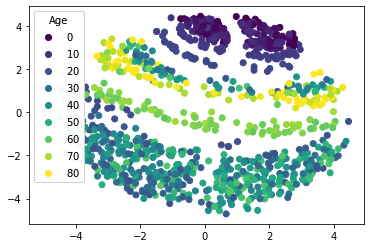

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(transformed[:,0],transformed[:,1], c=sample.Age*max_age)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Age")
ax.add_artist(legend)

Agora vamos repetir o processo, usando outra métrica de distância (citiblock)

In [ ]:
dist = squareform(pdist(sample,'cityblock'))
transformed = mds.fit_transform(dist)


it: 0, stress 511131080.61306965
it: 1, stress 127377362.08783491
it: 2, stress 124353041.84157532
it: 3, stress 122074845.97255787
it: 4, stress 120189723.03822576
it: 5, stress 118494537.00253701
it: 6, stress 116831230.89947292
it: 7, stress 115070591.86677034
it: 8, stress 113063788.17112216
it: 9, stress 110641956.39153658
it: 10, stress 107584185.59941441
it: 11, stress 103691416.73823732
it: 12, stress 98830222.78141846
it: 13, stress 92969686.2677493
it: 14, stress 86298169.77930173
it: 15, stress 79082919.9712533
it: 16, stress 71786911.84624417
it: 17, stress 65139122.17002038
it: 18, stress 59654206.014780745
it: 19, stress 55500802.41087053
it: 20, stress 52490477.76014935
it: 21, stress 50322325.26029572
it: 22, stress 48765765.86851126
it: 23, stress 47635165.83840613
it: 24, stress 46773213.01769224
it: 25, stress 46092418.83261568
it: 26, stress 45556226.17259277
it: 27, stress 45128384.620347545
it: 28, stress 44788229.5563753
it: 29, stress 44515298.459125526
it: 30, 

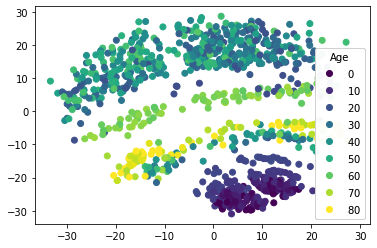

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(transformed[:,0],transformed[:,1], c=sample.Age*max_age)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Age")
ax.add_artist(legend)

## Associações entre variáveis

Agora vamos investigar algumas associações entre variáveis nessa base (usando a baso original)

### Categórico X Categórico

In [ ]:
pd.crosstab(NHANES['SurveyYr'],NHANES['Gender'])

Gender,female,male
SurveyYr,,
2009_10,2525,2475
2011_12,2495,2505


In [ ]:
pd.crosstab(NHANES['Gender'],NHANES['AgeDecade'])

AgeDecade,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
Gender,,,,,,,,
female,653,684,681,677,681,623,480,348
male,738,690,675,661,717,681,439,239


In [ ]:
pd.crosstab(NHANES['Gender'],NHANES['Marijuana'])

Marijuana,No,Yes
Gender,,
female,1077,1270
male,972,1622


In [ ]:
pd.crosstab(NHANES['AgeDecade'],NHANES['TVHrsDay'])

TVHrsDay,0_hrs,0_to_1_hr,1_hr,2_hr,3_hr,4_hr,More_4_hr
AgeDecade,,,,,,,
0-9,9,95,155,172,78,39,38
10-19,11,84,138,210,125,56,64
20-29,23,106,136,177,103,55,72
30-39,17,109,133,187,82,52,51
40-49,11,101,119,195,108,56,80
50-59,9,88,123,165,119,93,93
60-69,11,34,50,109,112,64,85
70+,7,8,19,40,58,67,82


In [ ]:
pd.crosstab(NHANES['AgeDecade'],NHANES['SexOrientation'])

SexOrientation,Bisexual,Heterosexual,Homosexual
AgeDecade,,,
10-19,8,208,6
20-29,52,1091,17
30-39,24,1069,22
40-49,14,1174,18
50-59,21,1096,22


In [ ]:
pd.crosstab(NHANES['Depressed'],NHANES['SexOrientation'])

SexOrientation,Bisexual,Heterosexual,Homosexual
Depressed,,,
Most,27,271,10
None,66,3651,48
Several,26,710,27


In [ ]:
pd.crosstab(NHANES['Depressed'],NHANES['SexOrientation'],normalize=1)

SexOrientation,Bisexual,Heterosexual,Homosexual
Depressed,,,
Most,0.226891,0.058506,0.117647
None,0.554622,0.788212,0.564706
Several,0.218487,0.153282,0.317647


### Categórico X Numérico

In [ ]:
NHANES.groupby('Gender')['nPregnancies'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,2604.0,3.026882,1.795341,1.0,2.0,3.0,4.0,32.0
male,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
NHANES.groupby('Gender')['Height'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,4847.0,156.615865,16.791945,83.8,154.3,160.6,165.9,184.5
male,4800.0,167.191333,21.866307,83.6,166.2,173.8,179.4,200.4


In [ ]:
NHANES.groupby('Gender')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,4841.0,26.772078,7.898886,12.88,21.24,25.56,31.2,81.25
male,4793.0,26.547073,6.807454,12.89,22.10,26.31,30.6,63.91


In [ ]:
NHANES.groupby('HHIncome')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
HHIncome,,,,,,,,
0-4999,176.0,26.833807,8.820063,14.38,20.2000,25.90,31.0700,80.60
5000-9999,245.0,26.624245,8.617181,14.00,20.0200,26.10,31.7100,66.96
10000-14999,522.0,27.646724,8.240633,13.20,21.5575,26.95,32.2750,65.62
15000-19999,502.0,26.963227,8.117942,14.21,21.5775,25.70,31.6225,68.63
20000-24999,585.0,26.634188,7.826774,13.10,21.2000,25.76,31.2100,69.00
25000-34999,916.0,27.263439,7.665959,12.89,21.6925,26.77,32.0025,67.83
35000-44999,837.0,27.326559,7.986321,12.90,21.9200,26.50,31.7100,63.91
45000-54999,759.0,26.779407,7.580167,13.71,21.4500,25.73,31.0200,81.25
55000-64999,600.0,26.458517,6.710124,13.88,22.1000,26.00,30.5925,54.10


In [ ]:
NHANES.groupby('AgeDecade')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeDecade,,,,,,,,
0-9,1101.0,17.140845,3.012683,12.88,15.27,16.240,17.9500,33.60
10-19,1361.0,23.252961,6.027167,13.30,18.99,22.000,26.3000,55.07
20-29,1346.0,27.511553,6.950307,15.80,22.59,25.800,31.6000,80.60
30-39,1334.0,29.154243,6.968605,17.40,24.37,27.800,32.7375,69.00
40-49,1386.0,28.928492,6.461880,15.02,24.27,28.100,32.5075,65.62
50-59,1298.0,29.197735,6.582181,17.00,24.90,28.100,32.6000,81.25
60-69,908.0,29.592137,6.508981,15.22,25.29,28.385,32.9000,66.96
70+,577.0,29.242184,6.406284,16.60,24.78,28.370,32.1000,65.19


##  Numérico x Numérico

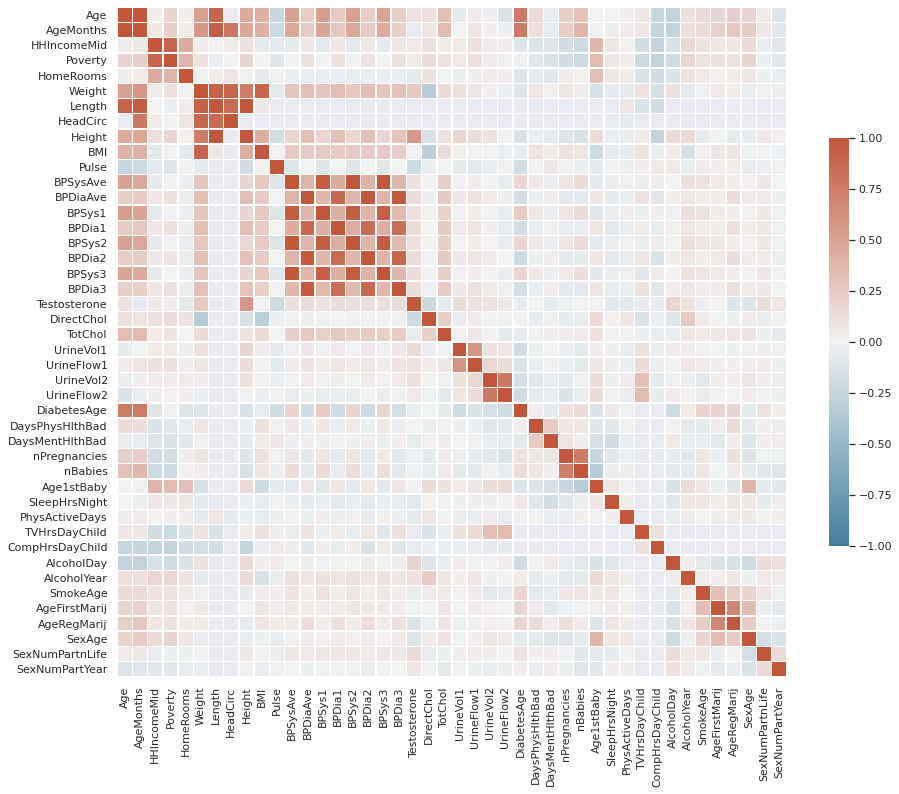

In [ ]:
corr=NHANES.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.set(rc={'figure.figsize':(15,15)})

sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



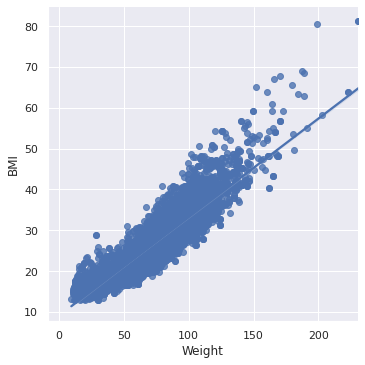

In [ ]:
sns.lmplot(data=NHANES,x='Weight',y='BMI')

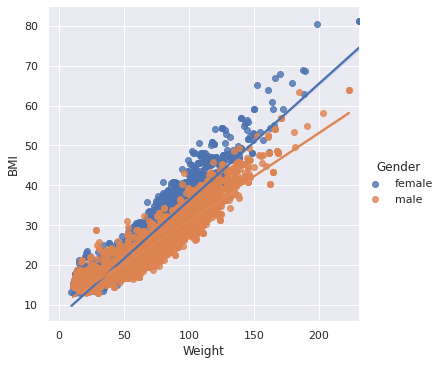

In [ ]:
sns.lmplot(data=NHANES,x='Weight',y='BMI',hue='Gender')

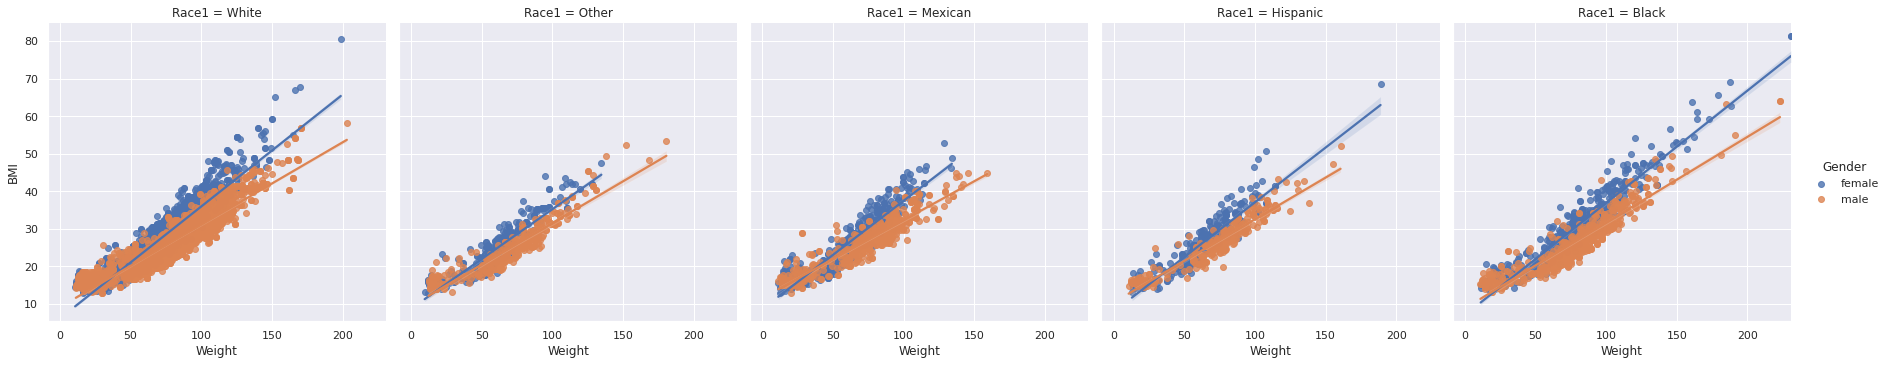

In [ ]:
sns.lmplot(data=NHANES,x='Weight',y='BMI',hue='Gender',col='Race1')

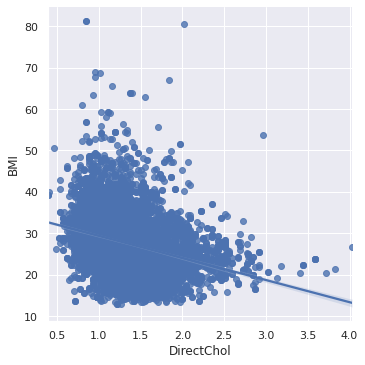

In [ ]:
sns.lmplot(data=NHANES,x='DirectChol',y='BMI')

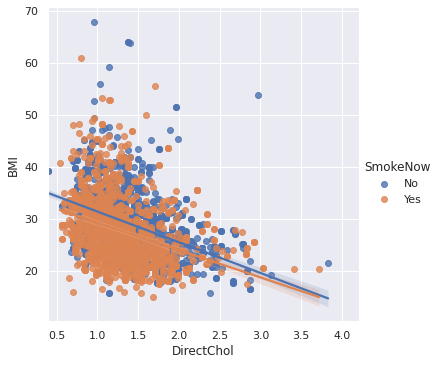

In [ ]:
sns.lmplot(data=NHANES,x='DirectChol',y='BMI',hue='SmokeNow')

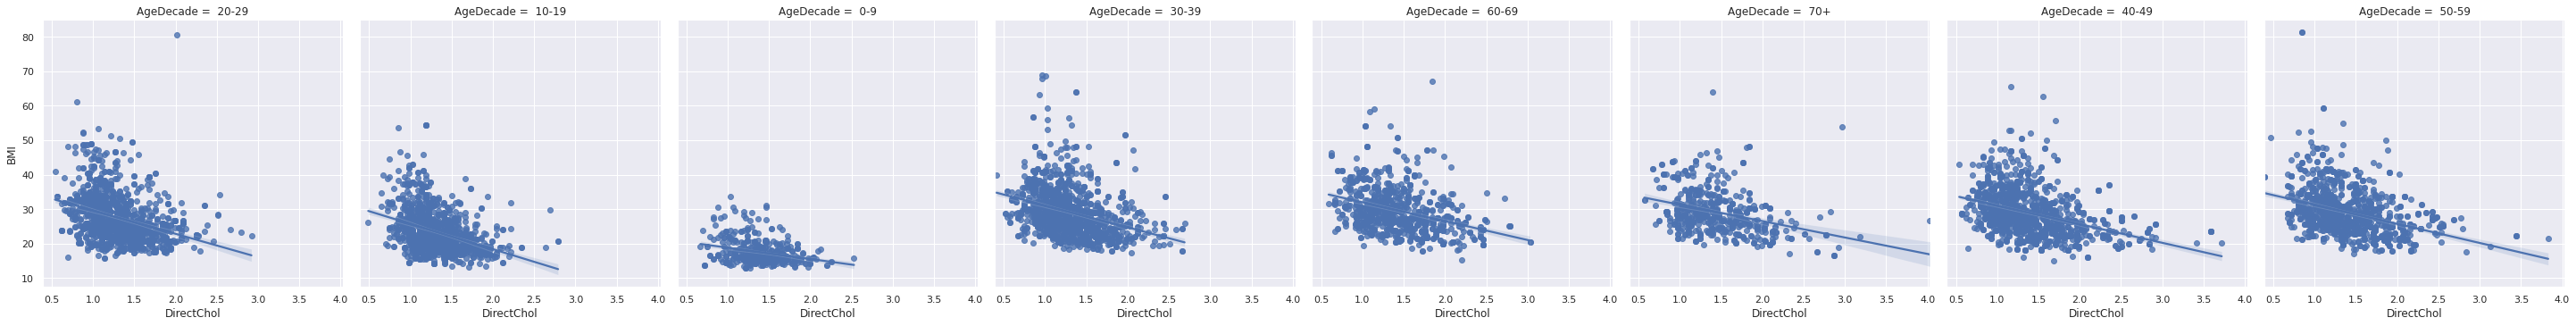

In [ ]:
sns.lmplot(data=NHANES,x='DirectChol',y='BMI',col='AgeDecade')

### Análise de correlãções dos nomes populares do Brasil

O Instituto Brasileiro de Geografia e Estatística (IBGE) publicou uma [base de dados](https://censo2010.ibge.gov.br/nomes/#/search) com o primeiro nome dos moradores do Brasil colhidos no censo de 2010. A base de dados permite a consulta por década de nascimento e por localidade. Vamos analisar os nomes mais populares de acordo com a década de nascimento.

O IBGE desconsiderou acentos, de maneira Antônio e Antonio são catabilizados como o mesmo nome. Além disso, devido à politica de privacidade, somente aparecem na base nomes cuja contagem é pelo menos 20, e todos os nomes são convertidos para caixa alta (letras maiúsculas). Dessa maneira, não estão contabilizados todos os habitatens, uma vez que a contagem de nomes muito raros não foram disponilizados. O arquivo [`nomes-decada-ibge.csv`](https://drive.google.com/file/d/1r9UbPXPSwKeNbCbkGHJNLKVvle_Hqfkf/view?usp=sharing) contém os nomes dos residentes do Brasil de acordo com o censo de 2010, separados por década de nascimento. Na primeira coluna temos o primeiro nome, seguido do número de pessoas com aquele primeiro nome contabilizada no censo. Vamos abrir esse arquivo com o pandas, usando a primeira coluna como índice. 

In [ ]:
# carrega a base de dados
nomes = pd.read_csv('https://drive.google.com/u/3/uc?id=1r9UbPXPSwKeNbCbkGHJNLKVvle_Hqfkf&export=download',index_col='Nome')

In [ ]:
nomes.head()

,ate1930,ate1940,ate1950,ate1960,ate1970,ate1980,ate1990,ate2000,ate2010
Nome,,,,,,,,,
MARIA,336477.0,749053.0,1487042.0,2476482.0,2495491.0,1616019.0,917968.0,544296.0,1111301.0
ANA,33395.0,56160.0,101259.0,183941.0,292835.0,421531.0,529266.0,536302.0,935169.0
JOAO,60155.0,141772.0,256001.0,396438.0,429148.0,279975.0,273960.0,352552.0,794118.0
GABRIEL,1267.0,2744.0,4256.0,6095.0,6559.0,9103.0,46996.0,271405.0,584024.0
LUCAS,388.0,937.0,1593.0,2787.0,4425.0,9954.0,84484.0,517436.0,505306.0


Vamos calcular a correlação entre as decadas:

In [ ]:
corre_mat = nomes.corr()

In [ ]:
corre_mat

,ate1930,ate1940,ate1950,ate1960,ate1970,ate1980,ate1990,ate2000,ate2010
ate1930,1.000000,0.996113,0.991919,0.984082,0.963575,0.870402,0.657785,0.456437,0.600890
ate1940,0.996113,1.000000,0.998060,0.991133,0.973051,0.878698,0.663101,0.458982,0.590795
ate1950,0.991919,0.998060,1.000000,0.996747,0.981963,0.889518,0.668770,0.458337,0.584092
ate1960,0.984082,0.991133,0.996747,1.000000,0.991187,0.904537,0.683194,0.466649,0.587236
ate1970,0.963575,0.973051,0.981963,0.991187,1.000000,0.943627,0.735187,0.504737,0.603655
ate1980,0.870402,0.878698,0.889518,0.904537,0.943627,1.000000,0.872836,0.606589,0.628741
ate1990,0.657785,0.663101,0.668770,0.683194,0.735187,0.872836,1.000000,0.828855,0.706303
ate2000,0.456437,0.458982,0.458337,0.466649,0.504737,0.606589,0.828855,1.000000,0.850446
ate2010,0.600890,0.590795,0.584092,0.587236,0.603655,0.628741,0.706303,0.850446,1.000000


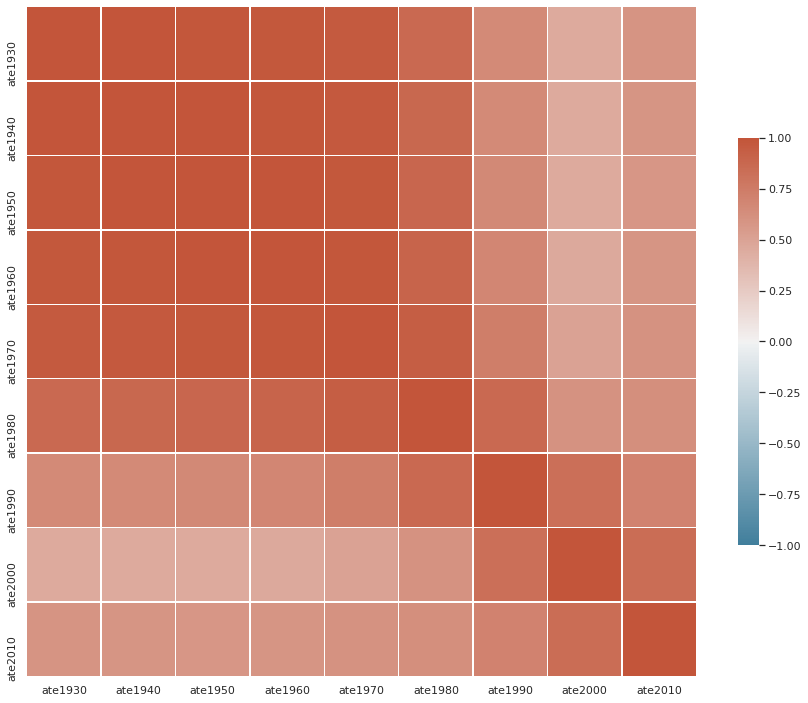

In [ ]:
sns.heatmap(corre_mat, cmap=cmap, vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [ ]:
transformed = mds.fit_transform(1-corre_mat)

it: 0, stress 5.729862124005521
it: 1, stress 0.5299473159481306
it: 2, stress 0.16005928710883338
it: 3, stress 0.09928451618475201
it: 4, stress 0.07166210756218307
it: 5, stress 0.05442219516288397
it: 6, stress 0.04293780154534789
it: 7, stress 0.03517390075312935
it: 8, stress 0.02990547168653914
it: 9, stress 0.02632909173271895
it: 10, stress 0.023904421076169358
it: 11, stress 0.022264529907500982
it: 12, stress 0.02115894421402051
breaking at iteration 12 with stress 0.02115894421402051
it: 0, stress 8.70863509759531
it: 1, stress 1.2221883325973164
it: 2, stress 0.603825345795383
it: 3, stress 0.4469353787284952
it: 4, stress 0.3349844912852153
it: 5, stress 0.2414800309875434
it: 6, stress 0.1693177197528738
it: 7, stress 0.11995379093432498
it: 8, stress 0.08917748471240464
it: 9, stress 0.07100801335955695
it: 10, stress 0.06047035313108421
it: 11, stress 0.054274465098227906
it: 12, stress 0.05048587677543975
it: 13, stress 0.048029053807861925
it: 14, stress 0.0463143946

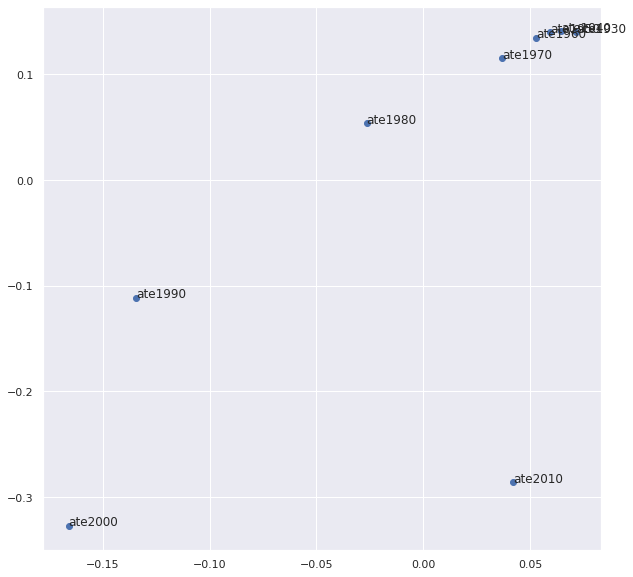

In [ ]:
fig = plt.figure(figsize=(10,10))

plt.scatter(transformed[:,0],transformed[:,1])
for i in range(len(transformed)):
  plt.text(transformed[i,0],transformed[i,1],corre_mat.columns[i])

In [ ]:
top50 = nomes.sum(axis=1).sort_values(ascending=False).head(50)

In [ ]:
top50

Nome
MARIA        11734129.0
JOSE          5754529.0
ANA           3089858.0
JOAO          2984119.0
ANTONIO       2576348.0
FRANCISCO     1772197.0
CARLOS        1489191.0
PAULO         1423262.0
PEDRO         1219605.0
LUCAS         1127310.0
LUIZ          1107792.0
MARCOS        1106165.0
LUIS           935905.0
GABRIEL        932449.0
RAFAEL         821638.0
FRANCISCA      725642.0
DANIEL         711338.0
MARCELO        693215.0
BRUNO          668217.0
EDUARDO        632664.0
FELIPE         621460.0
RAIMUNDO       613361.0
RODRIGO        601650.0
ANTONIA        592815.0
MANOEL         592345.0
MATEUS         588819.0
ANDRE          583808.0
ADRIANA        567968.0
JULIANA        564706.0
FERNANDO       556346.0
MARCIA         553706.0
FABIO          547965.0
LEONARDO       547601.0
GUSTAVO        541480.0
FERNANDA       534757.0
PATRICIA       531065.0
GUILHERME      529001.0
ALINE          511737.0
LEANDRO        509248.0
TIAGO          495211.0
SANDRA         480379.0
ANDERSON   

In [ ]:
nomes50 = nomes.loc[top50.index].T

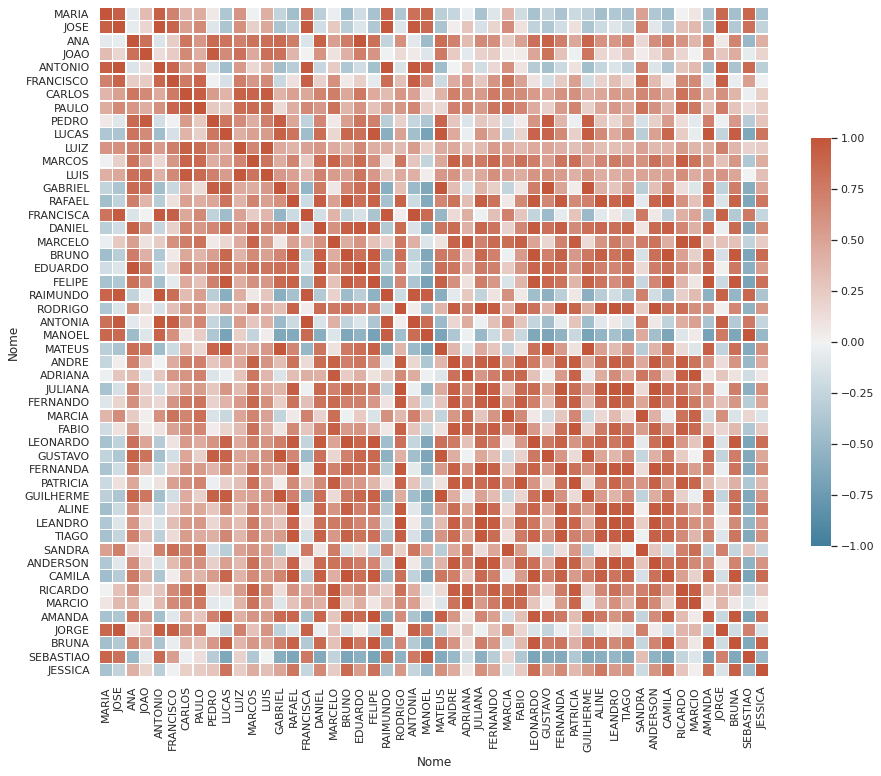

In [ ]:
corr_mat = nomes50.corr()

sns.heatmap(corr_mat, cmap=cmap, vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


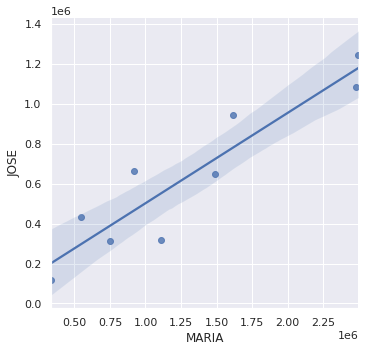

In [ ]:
sns.lmplot(data=nomes50,x='MARIA',y='JOSE')

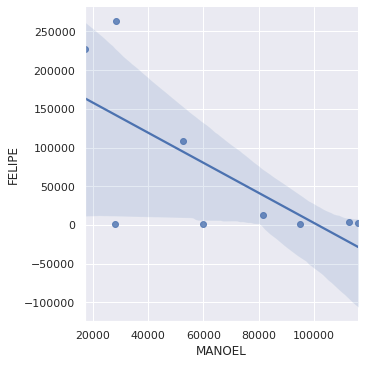

In [ ]:
sns.lmplot(data=nomes50,x='MANOEL',y='FELIPE')

it: 0, stress 374.6228124081709
it: 1, stress 313.77381706783035
it: 2, stress 234.06784423598634
it: 3, stress 197.5134097123959
it: 4, stress 187.4642945948308
it: 5, stress 180.34613947985457
it: 6, stress 173.14926469666256
it: 7, stress 164.35734347339314
it: 8, stress 152.79783739304185
it: 9, stress 138.3996505179918
it: 10, stress 121.15813421162613
it: 11, stress 103.66563838364009
it: 12, stress 88.88825295025515
it: 13, stress 78.17805918461552
it: 14, stress 70.86278045383179
it: 15, stress 65.85199246518047
it: 16, stress 61.70892941112034
it: 17, stress 56.99484240781459
it: 18, stress 50.457317464195995
it: 19, stress 41.86863762323975
it: 20, stress 32.815552194431106
it: 21, stress 25.30637484536338
it: 22, stress 20.12388870199043
it: 23, stress 16.915892280934145
it: 24, stress 15.027504555251243
it: 25, stress 13.93385207212052
it: 26, stress 13.298941920033702
it: 27, stress 12.924878356541647
it: 28, stress 12.697698743143421
it: 29, stress 12.539282121795043
it: 

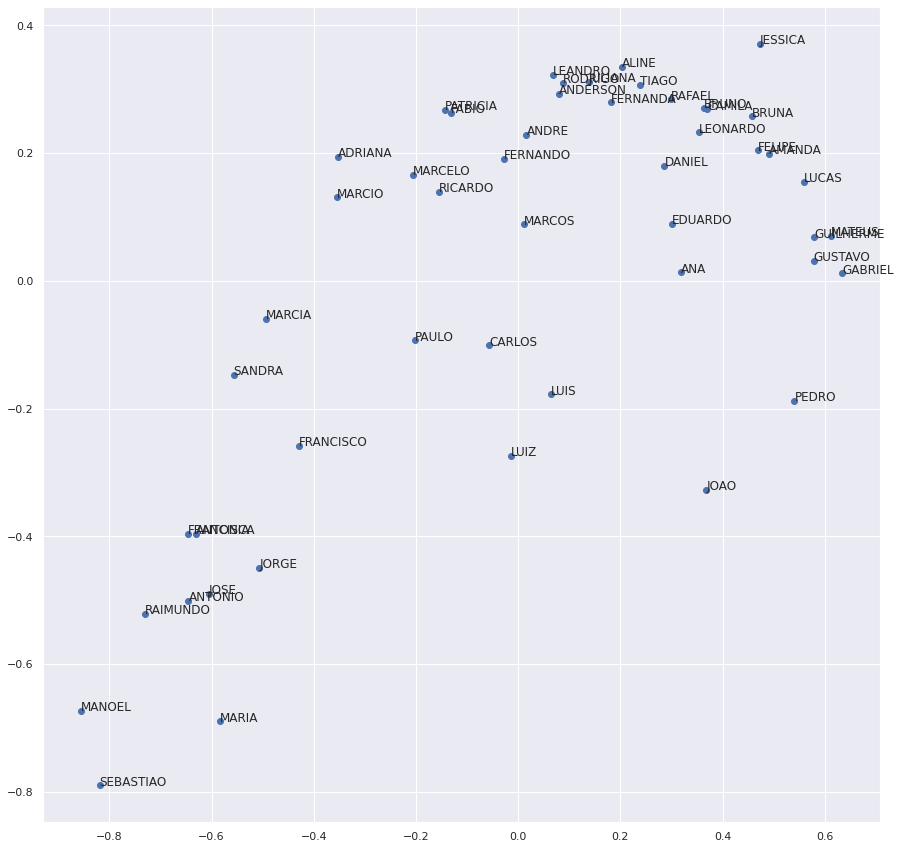

In [ ]:
transformed = mds.fit_transform(1-corr_mat)
plt.scatter(transformed[:,0],transformed[:,1])
for i in range(len(transformed)):
  plt.text(transformed[i,0],transformed[i,1],top50.index[i])

## Paradoxo de Simpson

Para ilustrar o paradoxo de Simpson, vamos ilustrar o caso de estatísticas de COVID nos primeiros meses de infeção, comparando os países China e Itália. Esse exemplo é baseado no [vídeo](https://www.youtube.com/watch?v=t-Ci3FosqZs&t=135s), e no [artigo](https://github.com/Juliusvk/Covid19-age-related-causal-effects). A base de dados a seguir contém estatística da Itália, no dia 9 de março de 2020, e da China, do dia 17 de Fevereiro de 2020.

In [ ]:

covid = pd.read_csv('http://professor.ufabc.edu.br/~ronaldo.prati/MineracaoDados/bases/simpson.csv',index_col=0)

In [ ]:
covid

,Country,Date of reporting,Age group,Confirmed cases,Confirmed fatalities
0,China,17 February2020,0-9,416,0
1,China,17 February2020,10-19,549,1
2,China,17 February2020,20-29,3619,7
3,China,17 February2020,30-39,7600,18
4,China,17 February2020,40-49,8571,38
5,China,17 February2020,50-59,10008,130
6,China,17 February2020,60-69,8583,309
7,China,17 February2020,70-79,3918,312
8,China,17 February2020,80+,1408,208
9,Italy,9 March2020,0-9,43,0


Primeiramente, vamos calcular as estatísticas agregadas:

In [ ]:
agrupado_pais = covid.groupby('Country').sum()

E Calcular a taxa de mortalidade, dividindo o número de mortos pelo total de casos confirmados:

In [ ]:
agrupado_pais['Mortality (%)'] = agrupado_pais['Confirmed fatalities']/agrupado_pais['Confirmed cases']*100

In [ ]:
agrupado_pais

,Confirmed cases,Confirmed fatalities,Mortality (%)
Country,,,
China,44672,1023,2.290025
Italy,8026,357,4.448044


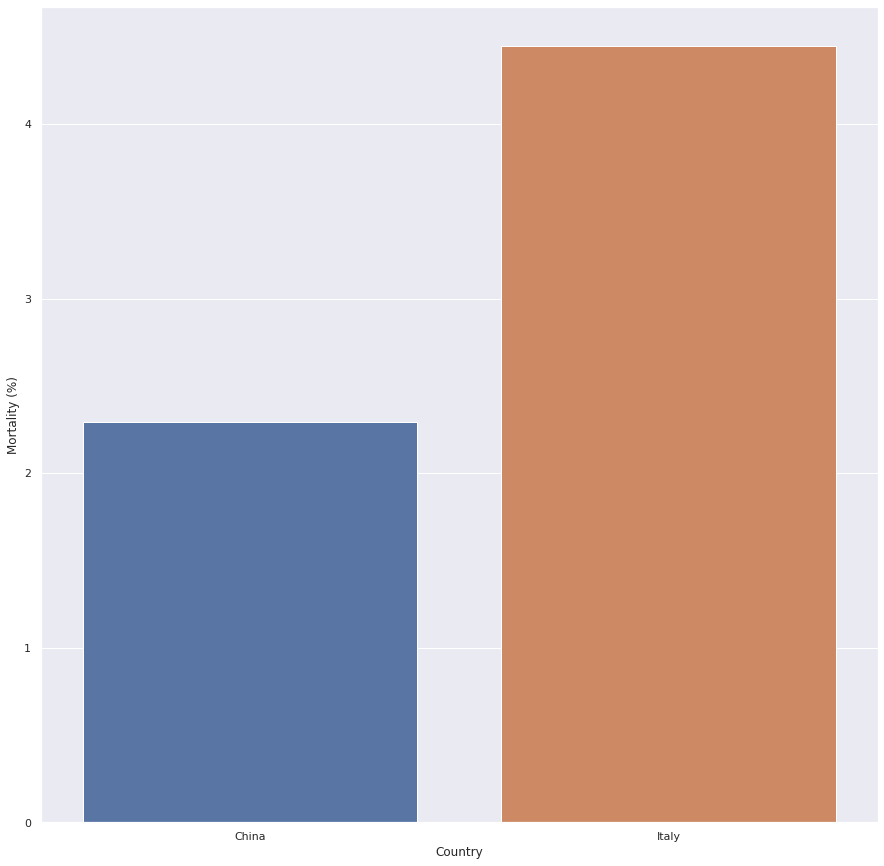

In [ ]:
sns.barplot(data=agrupado_pais,x=agrupado_pais.index,y='Mortality (%)')

Agora vamos calcular a taxa de mortalidade por faixa etária:

In [ ]:
covid['Mortality (%)'] = covid['Confirmed fatalities']/covid['Confirmed cases'] * 100

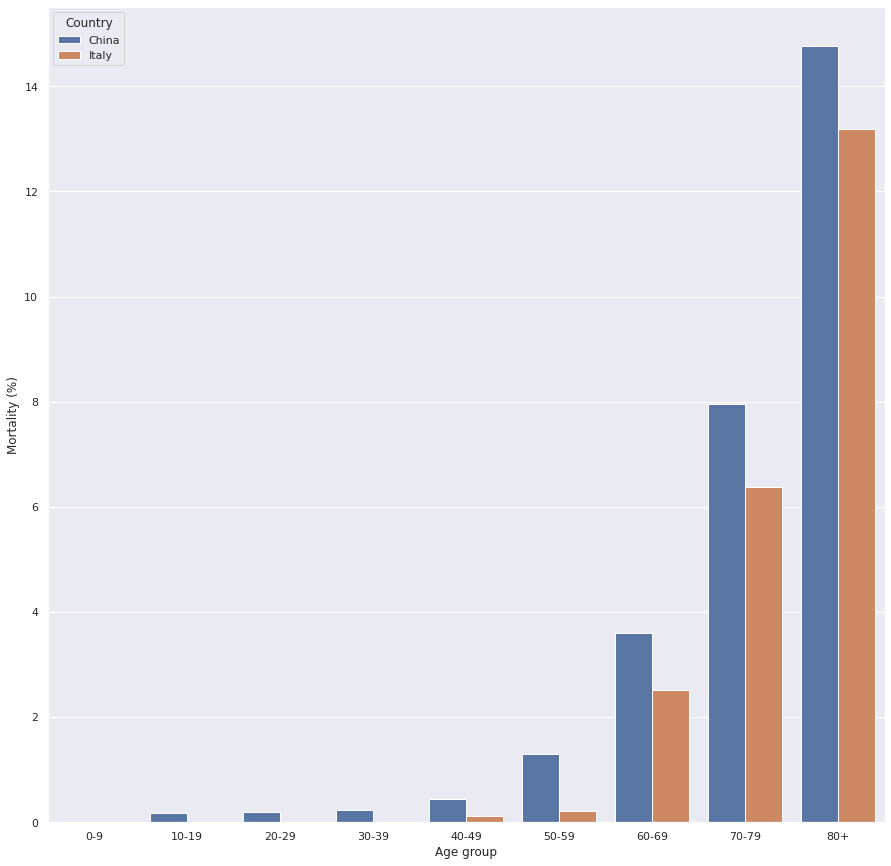

In [ ]:
sns.barplot(data=covid,x='Age group',y='Mortality (%)',hue='Country')

Esse é um exemplo do paradoxo de Simposon já que considerando os dados agregados, a taxa de mortalidade da Itália é maior que a da China, mas considerando por faixa etária, para todas as faixas etárias, a da china é maior.

In [ ]:
cases_by_age_group = covid.groupby('Country').apply(lambda g: (g['Confirmed cases']/g['Confirmed cases'].sum())*100)
covid['Cases Age Group (%)'] = list(cases_by_age_group)

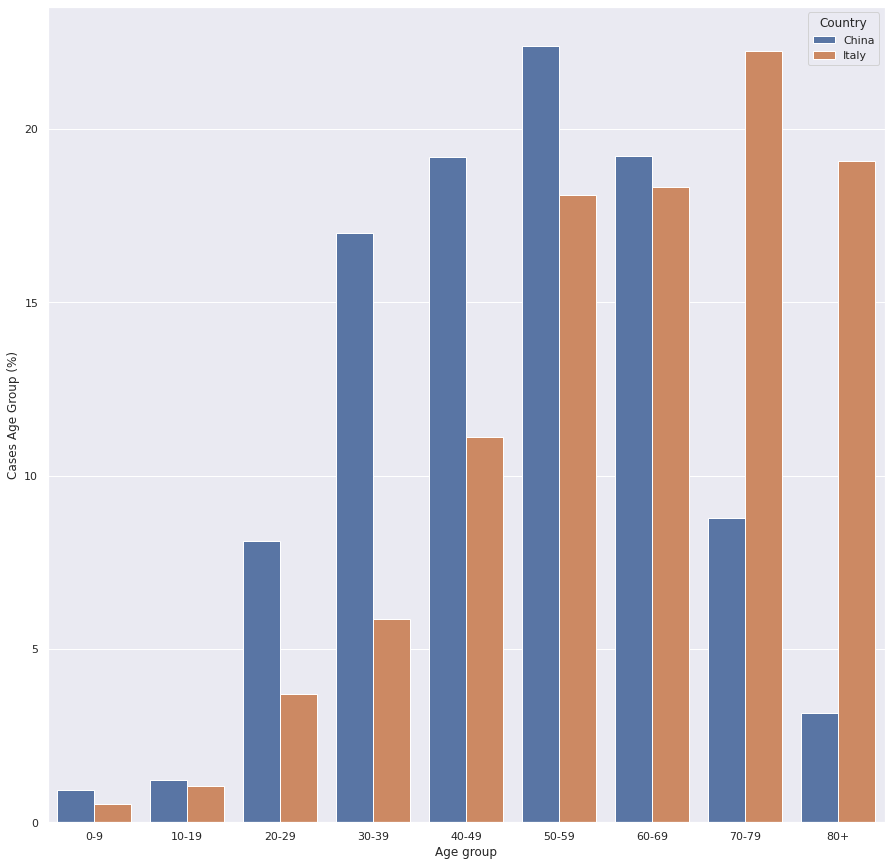

In [ ]:
sns.barplot(data=covid,x='Age group',y='Cases Age Group (%)',hue='Country')